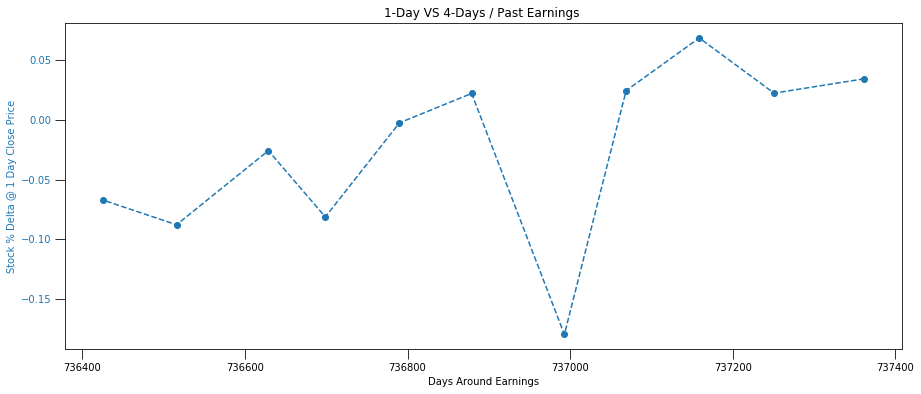

In [2]:
from IPython.display import display, HTML

import sys
sys.path.append('/home/michael/jupyter/local-packages')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

import numpy as np
import pandas as pd

import datetime

# Work with saved data
from pathlib import Path

theBaseCompaniesDirectory = '/home/michael/jupyter/earningDateData/Companies/'
csvSuffix = '.csv'
excelSuffix = '.xlxs'

# Starting Monday of earnings week
startday = '2020-01-06' 

# Get saved data
companyEarningsWeek = startday + '/'
companyListFile = 'SummaryWeekOf-' + startday + excelSuffix
x = theBaseCompaniesDirectory + companyEarningsWeek
earningWeekDir = Path(x)

excelEarningsDateDF =  pd.read_excel('/home/michael/jupyter/earningDateData/Companies/2020-01-06/SummaryWeekOf-2020-01-06.xlsx', 'PSMT')

# seperate out the current earnings line and past earning DF from Excel
excelCurrentEarningsDateDF = excelEarningsDateDF.iloc[0:1,]
excelPastEarningsDateDF = excelEarningsDateDF.iloc[2:,]

# pull out the headers then save the remaining Past Earnings DF
headers = excelPastEarningsDateDF.iloc[0]
excelPastEarningsDateDF  = pd.DataFrame(excelPastEarningsDateDF.values[1:], columns=headers)

# reindex new DF
excelPastEarningsDateDF.reindex

#create to np array to display in matplotlib!!!!
earningsMdate_np = excelPastEarningsDateDF.Earnings_Date.values
earnings1DayMove_np = excelPastEarningsDateDF.EDFwd1DayClosePercentDelta.values

# Convert date string to a datenum using dateutil.parser.parse().
earningsMdate_np = mdates.datestr2num(earningsMdate_np)  #np.core.defchararray.rstrip(earningsDate_np, 10))

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
formatter.formats = ["%b-%d-%Y"]

color1DayStockMove = 'tab:blue'
color4DayStockMove = 'tab:red'
xLabel = 'Days Around Earnings'
yLabel1DayStockMove = 'Stock % Delta @ 1 Day Close Price';
yLabel4DayStockMove = 'Stock % Delta @ 4 Day Close Price';
ax1LegendLabel = "1-Day % Move"
ax2LegendLabel = "4-Day % Move"

# single Plot
theStock = excelPastEarningsDateDF.iloc[0,0]
fig, ax1 = plt.subplots(figsize=(15,6))

    
ax1.set_title('1-Day VS 4-Days / Past Earnings ');


ax1.set_xlabel(xLabel);
ax1.set_ylabel(yLabel1DayStockMove, color=color1DayStockMove);
ax1.tick_params(axis='y', labelcolor=color1DayStockMove);
ax1.tick_params(which='major', length=10)
ax1.tick_params(which='minor', length=4, color='b') 



formatter = mdates.DateFormatter('%Y-%m-%d')

ax1.plot(earningsMdate_np, earnings1DayMove_np, color=color1DayStockMove, 
         label=ax1LegendLabel,  linestyle='--', marker='o' );


# fig.autofmt_xdate()
# #      #set up Major/Minor xAxis 
# ax1.xaxis.set_major_locator(locator)
# ax1.xaxis.set_major_formatter(formatter)
    # Format xAxis Date
# ax1.xaxis.set_major_formatter(myFmt)
# ax1.tick_params(which='major', length=10)
# ax1.tick_params(which='minor', length=4, color='b') 